
### Introduction to Least-Squares Fitting Using Singular Value Decomposition (SVD)

In this notebook, we'll explore how Singular Value Decomposition (SVD) can be utilized for efficient least-squares fitting in linear regression scenarios. This method is particularly useful in handling complex datasets that include noise and outliers. Our approach will involve the following key steps:

1. **Data Synthesis**: We will generate a synthetic dataset to simulate a linear relationship. The dataset will consist of an independent variable `a` and a dependent variable `b`, where `b` is derived from `a` with added Gaussian noise. To mimic real-world data challenges, we will also introduce significant outliers into `b`.

2. **Application of SVD**: We'll perform SVD on our dataset, breaking down the matrix `a` into its constituent SVD components - `U`, `S`, and `Vt`. These components reveal the intrinsic geometric properties of the data matrix.

3. **Computing the Least-Squares Solution**: Utilizing the SVD components, we will compute the least-squares solution, `xtilde`. This involves calculating the pseudo-inverse of matrix `a` and applying it to `b`. This step is fundamental in determining the best linear fit under the least-squares criterion.

4. **Visualization**: Finally, we will visualize both the original noisy data and the least-squares fit. This will demonstrate the effectiveness of SVD in extracting the underlying linear relationship from a dataset affected by noise and outliers.


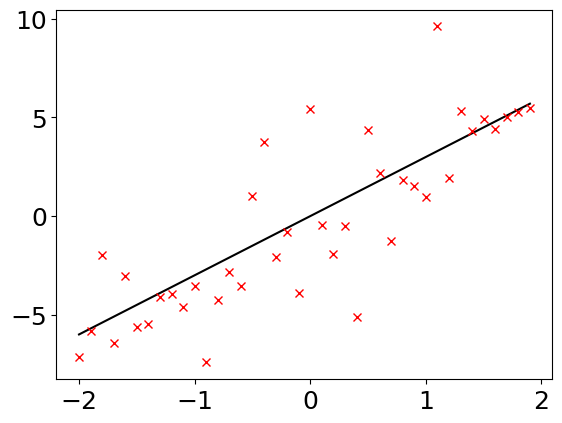

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex']=False
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth']=1.5

x= 3    # real slope of the regression
a=np.arange(-2,2,0.1).reshape(-1,1)
b=a*x + 2.5*np.random.randn(*a.shape)   # add noise

# Outliners will cause the least-square fit to perform poorly. If two lines below is uncommented this can be observed in the second graph
# b[0] *= 50 
# b[-1] *= 20


plt.plot(a, x * a, 'k')  # true regression
plt.plot(a, b, 'rx')  # noisy measurements
plt.show()

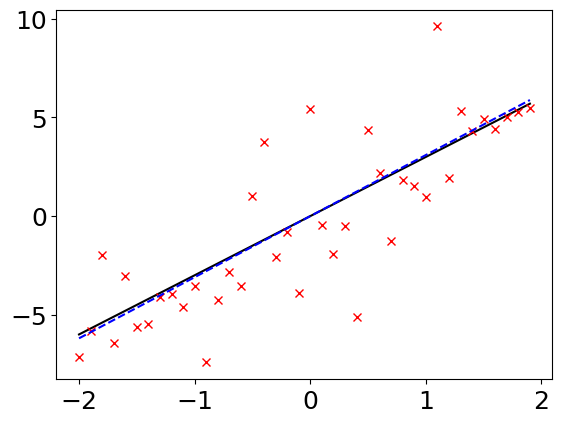

In [29]:
U, S, Vt = np.linalg.svd(a, full_matrices=False)    # Compute the SVD
xtilde = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b     # Using np.linalg.pinv to compute the pseudo-inverse

plt.plot(a, x * a, 'k')  # true regression
plt.plot(a, b, 'rx')  # noisy measurements
plt.plot(a, xtilde * a, 'b--')  # Plot the least-square fit
plt.show()

SVD of A:
$$ A = USV^T $$

Pseudo-Inverse of A using SVD components:
$$ A^+ = V \cdot S^+ \cdot U^T $$

Matrix Multiplications:
- $ V^T $ is the transpose of $ V $.
- $ \text{np.linalg.inv}(\text{diag}(S)) $ constructs a diagonal matrix from the singular values in $ S $ and then takes its inverse, which is $ S^+ $.
- $ U^T $ is the transpose of $ U $.

Matrix Multiplication of A⁺ and b:
$$ x_{\text{tilde}} = A^+b $$

After we found $ x_{\text{tilde}} $, we recreate the graph to show how the least-square fit is shown graphically. As you can see from the graph above, we have a close solution to actual $ x $ slope. If outliners are created the solution whill result poorly as mentioned in the first code section.

### Study of Multi-Linear Regression

`Dataset: Cement Heat Generation`

Y: Heat evolved per gram of cement (in calories)

X1: Amount of tricalcium aluminate 

X2: Amount of tricalcium silicate 

X3: Amount of tetracalcium alumino ferrite 

X4: Amount of dicalcium silicate




In [30]:
import pandas as pd

df=pd.read_csv('../../data/cement.csv').drop('rownames',axis=1)
df.head()

,x1,x2,x3,x4,y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9


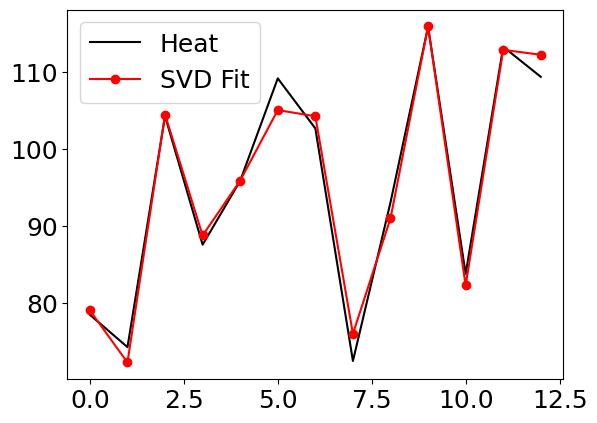

In [52]:
b=np.array(df['y'])
A=np.array(df.drop('y',axis=1))
U,S,Vt=np.linalg.svd(A,full_matrices=False)

xtilde=Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

# Plotting
plt.plot(b, 'k', label='Heat')  # Original data
plt.plot(A @ xtilde, 'r-o', label='SVD Fit')  # SVD fit
plt.legend()
plt.show()


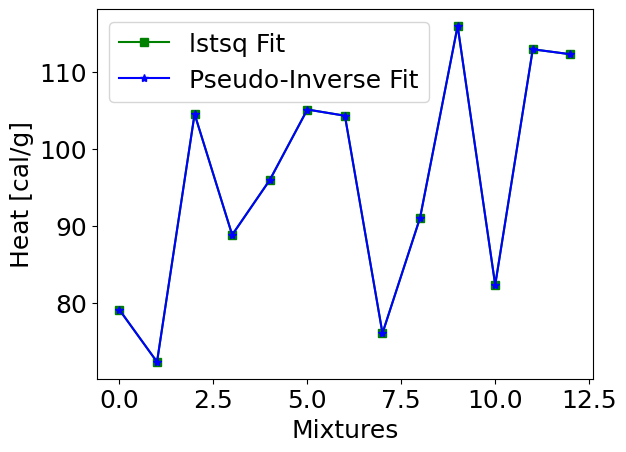

In [57]:
# Alternative Solutions
x1 = np.linalg.lstsq(A, b, rcond=None)[0]  # Using np.linalg.lstsq as a substitute for MATLAB's regress
x2 = np.linalg.pinv(A) @ b  # Using pseudo-inverse, built-in version of what we have done above

plt.plot(A @ x1, 'g-s', label='lstsq Fit')  # Alternative 1 fit
plt.plot(A @ x2, 'b-*', label='Pseudo-Inverse Fit')  # Alternative 2 fit

plt.xlabel('Mixtures')
plt.ylabel('Heat [cal/g]')
plt.legend()
plt.show()


The expression `np.linalg.pinv(A) @ b` in Python essentially accomplishes the same goal as computing `x` using the Singular Value Decomposition (SVD) method, but in a more direct way. Both methods are used to solve a linear system \( Ax = b \) in a least-squares sense, especially useful when \( A \) is not square or not invertible. Let's compare these two methods:

1. **SVD Method**: 
   - The SVD approach involves decomposing the matrix \( A \) into three matrices \( U, S, \) and \( V^T \) (where \( V^T \) is the transpose of \( V \)) such that \( A = USV^T \).
   - The least-squares solution is then computed using these components, with the formula \( x = V S^+ U^T b \), where \( S^+ \) is the pseudo-inverse of the diagonal matrix \( S \). This method is explicitly calculating the pseudo-inverse of \( A \) using its SVD.

2. **Using `np.linalg.pinv`**:
   - `np.linalg.pinv(A)` computes the Moore-Penrose pseudo-inverse of \( A \) directly, which is a way of generalizing the matrix inverse for non-square matrices.
   - When you multiply this pseudo-inverse by \( b \) (i.e., `np.linalg.pinv(A) @ b`), you get the least-squares solution to \( Ax = b \). This is a more concise and direct way to achieve the same result as the SVD method.
3. **Using `np.linalg.lstsq`**:
   - The function in Python, which computes the least-squares solution to the equation $ Ax = b $, uses the QR decomposition method.
   - ``Summary of Mathematical Steps``:
   - **Step 1**: Decompose $ A $ into $ Q $ and $ R $ using QR decomposition.
   - **Step 2**: Transform the equation to $ R x = Q^T b $.
   - **Step 3**: Solve for $ x $ using back substitution.



In [80]:

df_x=pd.DataFrame(xtilde.T,index=["X1: Amount of tricalcium aluminate ",
                                  "X2: Amount of tricalcium silicate",
                                                "X3: Amount of tetracalcium alumino ferrite",
                                                "X4: Amount of dicalcium silicate"
])
df_x

,0
X1: Amount of tricalcium aluminate,2.193046
X2: Amount of tricalcium silicate,1.153326
X3: Amount of tetracalcium alumino ferrite,0.758509
X4: Amount of dicalcium silicate,0.486319


Coefficients are the result of the least-squares fitting process, indicating how each variable (ingredient) influences the dependent variable (e.g., strength, heat generation, etc.).